In [101]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
columns = [ 'Movie Name' , 'Genre' , 'Description']
column = ['Movie Name' , 'Description']

In [103]:
df_train = pd.read_csv('train_data.txt' , delimiter=':::' , engine='python' , names=columns , index_col=0 )
df_train.head()


,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [104]:
df_test = pd.read_csv('test_data_solution.txt', delimiter=':::' , engine='python' , names=columns , index_col=0 )
df_test.head()



,Movie Name,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


PREPROCESSING


In [105]:
df_train.loc[:,'Description'] = df_train['Description'].astype(str).str.lower()
df_test.loc[:,'Description'] = df_test['Description'].astype(str).str.lower()

print(df_train.columns)
print(df_test.columns)


Index(['Movie Name', 'Genre', 'Description'], dtype='object')
Index(['Movie Name', 'Genre', 'Description'], dtype='object')


In [106]:
del df_train['Movie Name']
del df_test['Movie Name']

In [107]:
df_test.head()

,Genre,Description
1,thriller,"l.r. brane loves his life - his car, his apar..."
2,comedy,"spain, march 1964: quico is a very naughty ch..."
3,documentary,one year in the life of albin and his family ...
4,drama,"his father has died, he hasn't spoken with hi..."
5,drama,before he was known internationally as a mart...


In [108]:
print(df_train.shape)
print(df_test.shape)

(54214, 2)
(54200, 2)


In [109]:
print("TRAINING DUPLICATES:", df_train.duplicated().sum())
print("TEST DUPLICATES:", df_test.duplicated().sum())

TRAINING DUPLICATES: 110
TEST DUPLICATES: 114


In [110]:
df_train = df_train.drop_duplicates(keep ='first')
df_test = df_test.drop_duplicates(keep = 'first')

In [111]:
print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())
print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


In [112]:
print(df_train.shape)
print(df_test.shape)

(54104, 2)
(54086, 2)


In [113]:
x_train_full = df_train['Description']
x_test = df_test['Description']
y_train_full = df_train['Genre']
y_test = df_test['Genre']
print(x_train_full.shape)
print(y_train_full.shape)

(54104,)
(54104,)


In [114]:
print(x_test.shape)
print(y_test.shape)

(54086,)
(54086,)


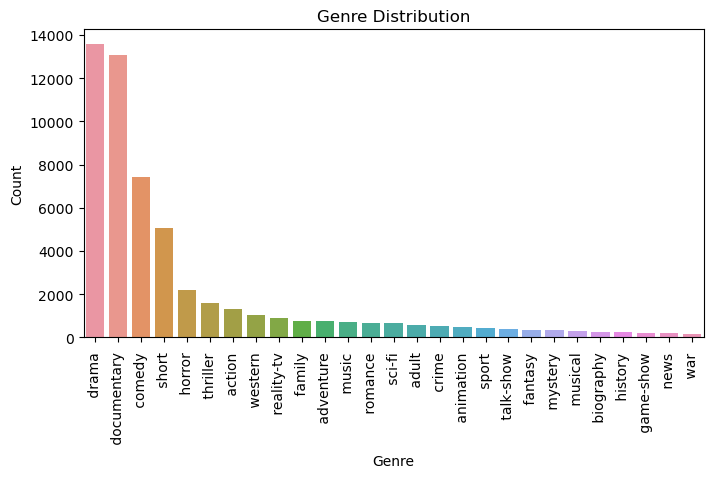

In [115]:
plt.figure(figsize=(8,4))
sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.show()

In [116]:
from sklearn.model_selection import train_test_split

X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)

print(X_train.shape)
print(X_val.shape)
print(x_test.shape)
print('\n')
print(Y_train.shape)
print(Y_val.shape)
print(y_test.shape)

(43283,)
(10821,)
(54086,)


(43283,)
(10821,)
(54086,)


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

tf = TfidfVectorizer(stop_words ='english' , max_features=4000)
X_train_vector = tf.fit_transform(X_train)
X_val_vector = tf.transform(X_val)
X_test_vector = tf.transform(x_test)

In [118]:
nb = MultinomialNB()
nb.fit(X_train_vector, Y_train)
y_pred_val = nb.predict(X_val_vector)
accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.5231494316606599
Validation Classification:
               precision    recall  f1-score   support

      action        0.47      0.06      0.11       271
       adult        0.46      0.05      0.09       118
   adventure        0.64      0.06      0.12       141
   animation        0.00      0.00      0.00        84
   biography        0.00      0.00      0.00        54
      comedy        0.50      0.42      0.46      1445
       crime        0.00      0.00      0.00        88
 documentary        0.58      0.88      0.70      2685
       drama        0.46      0.82      0.59      2720
      family        1.00      0.01      0.01       145
     fantasy        0.00      0.00      0.00        57
   game-show        0.91      0.25      0.39        40
     history        0.00      0.00      0.00        52
      horror        0.71      0.35      0.47       429
       music        0.86      0.17      0.28       148
     musical        0.00      0.00      0.00        

In [119]:
y_pred_test = nb.predict(X_test_vector)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("\nTest Accuracy:", accuracy_test)
print("Test Classification:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Test Accuracy: 0.5170469252671671
Test Classification:
               precision    recall  f1-score   support

      action        0.56      0.10      0.17      1314
       adult        0.49      0.07      0.12       590
   adventure        0.79      0.05      0.10       773
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.50      0.41      0.45      7437
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.87      0.69     13085
       drama        0.46      0.82      0.59     13565
      family        0.50      0.00      0.00       774
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.32      0.48       193
     history        0.00      0.00      0.00       243
      horror        0.68      0.33      0.45      2204
       music        0.77      0.14      0.23       720
     musical        0.00      0.00      0.00       273
     mys